<a href="https://colab.research.google.com/github/ferris77/my_notebooks/blob/main/python_tinyML/01-linear_regression_loss_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este notebook foi feito com base no material fornecido em aula durante o cuso Fundamentals of TinyML, na plataforma edX, como o único propósito de servir como meu guia de meus estudos pessoais.
Link para acesso ao curso: https://courses.edx.org/dashboard/programs/f7868191-7d7f-4292-b117-64549f1f483a/

Machine Learning envolve uma mudança de paradigma: Enviamos dados + respostas para o modelo e ele nos retorna a regra que leva os dados às respostas.
Neste primeiro exemplo, vamos explorar a funcionalidade para buscar a regra (função) que leva os valores X em / f(x) = y


Vamos utilizar como exemplo um conjunto de pares ordenados (x,y). Nosso objetivo será tentar encontrar uma função que correlacione o x com o y f(x) = y. Podemos plotar estes valores para ver como eles estão distribuidos no plano cartesiano:

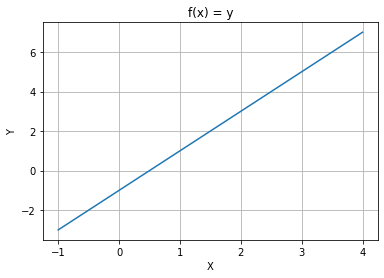

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Dados que iremos plotar
x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='X', ylabel='Y',
       title='f(x) = y')
ax.grid()

fig.savefig("test.png")
plt.show()

Do desenho acima, ficou claro que a regra é uma reta. Vamos usar uma abordagem com ML para determinar esta função.

In [11]:
import math

x = [-1, 0, 1, 2, 3, 4]
y = [-3, -1, 1, 3, 5, 7]

#vamos supor que o modelo é linear e estimar uma curva que encaixe o Y em função do valor de X
# y = a * x + b

a = 3
b = -1

#vamos armazenar os dados estimados para comparação posterior
Y_estimado = []

for item in x:
  Y_calculado = a*item+b
  Y_estimado.append(Y_calculado)

print('Y real:', y)

print('Y estimado:', Y_estimado)

# vamos definir a função de erro como sendo a diferença entre o Y que desejamos e o que calculamos
# vamos somar o erro de cada par de Y (calculado e esperado) para medir a precisão do modelo
# como podemos ter valores positivos e negativos, vamos elevar todas diferenças ao quadrado para sempre somarmos números positivos

erro_quadratico_total = 0
for i in range(0,len(y)):
  erro_quadratico = (y[i] - Y_estimado[i])**2
  erro_quadratico_total = erro_quadratico_total + erro_quadratico

print(f'Erro quadratico total {str(math.sqrt(erro_quadratico_total)):.4s}%', )

Y real: [-3, -1, 1, 3, 5, 7]
Y estimado: [-4, -1, 2, 5, 8, 11]
Erro quadratico total 5.56%


Vamos usar o código fornecido em aula para definir uma função que calcula o erro entre o valor esperado de Y e o valor real. Se minimizarmos esta função, teremos a melhor curva para nosso modelo (no caso, uma reta). Para tanto, iremos definir um palpite inicial (um chute), e vamos ajustando os parâmetros a e b de acordo com o erro. Enquanto o erro estiver fora de uma tolerância mínima, vamos caminhar ao longo do eixo x com pequenos incrementos. Como a função de erro quadrático é uma parábola, podemos usar o gradiente desta funçaõ para caminhar em direção ao valor mínimo. Dessa forma, iremos calcular a função gradiente do erro quadrático e avaliá-la continuamente pelo eixo x. De acordo com o valor do gradiente para certo x, incrementamos o valor de x em um pequeno passo, até chegar no valor mínimo do erro.

In [12]:
# First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Nosso palpite inicial
a_inicial = 10.0
b_inicial = 10.0

# Vamos definir uma função de erro
def loss(y_esperado, y_conhecido):
  return tf.reduce_mean(tf.square(y_esperado - y_conhecido))

# Vamos definir nosso procedimento de trieno
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
  # aqui iremos diferenciar o modelo (calcular o gradiente)
  da, db = t.gradient(current_loss, [model.a, model.b])
  # aqui iremos atualizar o modelo com base na taxa de aprendizado (learning_rate)
  model.a.assign_sub(learning_rate * da)
  model.b.assign_sub(learning_rate * db)
  return current_loss

# Vamos definir nosso modelo de regressão linear
class Model(object):
  def __init__(self):
    # inicializar com os valores de chute
    self.a = tf.Variable(a_inicial)
    self.b = tf.Variable(b_inicial)

  def __call__(self, x):
    return self.a * x + self.b

Agora, vamos treinar o modelo que criamos:

In [14]:
# vamos definir os valores de entrada para x, y e a taxa de aprendizado
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.09

# Instanciamos o modelo
model = Model()

# armazenar os valores de a e b para vermos depois
lista_a, lista_b = [], []
epochs = range(50)
losses = []
for epoch in epochs:
  lista_a.append(model.a.numpy())
  lista_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: a=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, lista_a[-1], lista_b[-1], current_loss))

Epoch  0: a=10.00 b=10.00, loss=715.66669
Epoch  1: a=-0.41 b=5.86, loss=27.47032
Epoch  2: a=-0.02 b=5.28, loss=22.43888
Epoch  3: a=0.16 b=4.69, loss=18.46284
Epoch  4: a=0.33 b=4.16, loss=15.19137
Epoch  5: a=0.49 b=3.68, loss=12.49958
Epoch  6: a=0.63 b=3.25, loss=10.28476
Epoch  7: a=0.76 b=2.85, loss=8.46238
Epoch  8: a=0.87 b=2.50, loss=6.96291
Epoch  9: a=0.98 b=2.17, loss=5.72914
Epoch 10: a=1.07 b=1.88, loss=4.71398
Epoch 11: a=1.16 b=1.61, loss=3.87870
Epoch 12: a=1.24 b=1.37, loss=3.19143
Epoch 13: a=1.31 b=1.15, loss=2.62593
Epoch 14: a=1.37 b=0.95, loss=2.16064
Epoch 15: a=1.43 b=0.77, loss=1.77779
Epoch 16: a=1.48 b=0.60, loss=1.46278
Epoch 17: a=1.53 b=0.45, loss=1.20359
Epoch 18: a=1.57 b=0.32, loss=0.99032
Epoch 19: a=1.61 b=0.20, loss=0.81484
Epoch 20: a=1.65 b=0.08, loss=0.67046
Epoch 21: a=1.68 b=-0.02, loss=0.55166
Epoch 22: a=1.71 b=-0.11, loss=0.45391
Epoch 23: a=1.74 b=-0.19, loss=0.37348
Epoch 24: a=1.76 b=-0.27, loss=0.30730
Epoch 25: a=1.79 b=-0.33, loss=0.2

In [15]:
print(f'Para x=10, nosso modelo retorna y={lista_a[-1]*10 + lista_b[-1]:.2f}')

Para x=10, nosso modelo retorna y=18.86


Vamos utilizar o TensorFlow para criar um modelo de aprendizado com redes neurais e comparar o valor com nossa análise acima. Uma rede neural com apenas um neurônio pode fazer isso, uma vez que, neste caso, buscamos uma função que aprenda dois parâmetros (a e b). Caso tenhamos mais neurônios em camadas podemos amplificar esta capacidade de associar parâmetros, aprendendo padrões mais complexos.

In [16]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

Estamos utilizando uma rede neural com neurônios densamente conectados (Dense layer). Há também outros tipos: convolucionais, recorrentes, etc. Há layers que não aprendem parâmetros, mas afetam as demais layers. Podem ser layers para reduzir a densidade das conexões (dropouts), reduzir a quantidade de dados fluindo pelas redes (pooling) e outras.

In [17]:
model = tf.keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 368ms/step - loss: 13.5659
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 10.9052
Epoch 3/500
1/1 [==============================] - 0s 5ms/step - loss: 8.8071
Epoch 4/500
1/1 [==============================] - 0s 4ms/step - loss: 7.1517
Epoch 5/500
1/1 [==============================] - 0s 2ms/step - loss: 5.8448
Epoch 6/500
1/1 [==============================] - 0s 4ms/step - loss: 4.8121
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 3.9952
Epoch 8/500
1/1 [==============================] - 0s 7ms/step - loss: 3.3483
Epoch 9/500
1/1 [==============================] - 0s 2ms/step - loss: 2.8350
Epoch 10/500
1/1 [==============================] - 0s 2ms/step - loss: 2.4271
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 2.1022
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 1.8426
Epoch 13/500
1/1 [==============================] - 0s 6m

In [18]:
print(f'Para x=10, nosso novo modelo retorna y={model.predict([10.0]).ravel()[0]:.2f}')

Para x=10, nosso novo modelo retorna y=18.98


Vamos agora analisar a mesma rede, porém, com dois neurônios. Vamos analisar também, individualmente, como cada neurônio afeta o resultado final do modelo.

Com um neurônio apenas, teremos no final um modelo treinado que retorna uma função y = a*x + b, sendo a e b os pesos do neurônio. Caos adicionemos mais uma neurônio a rede, termos uma saída na forma y = a1*x1 + b1 + a2*x2 + b2

In [19]:
my_layer_1 = keras.layers.Dense(units=2, input_shape=[1])

my_layer_2 = keras.layers.Dense(units=1)

model = tf.keras.Sequential([my_layer_1, my_layer_2])

model.compile(optimizer='sgd', loss='mean_squared_error')

 

xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)

ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

 

model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 610ms/step - loss: 4.7926
Epoch 2/500
1/1 [==============================] - 0s 6ms/step - loss: 3.3067
Epoch 3/500
1/1 [==============================] - 0s 6ms/step - loss: 2.2197
Epoch 4/500
1/1 [==============================] - 0s 6ms/step - loss: 1.5070
Epoch 5/500
1/1 [==============================] - 0s 5ms/step - loss: 1.0833
Epoch 6/500
1/1 [==============================] - 0s 6ms/step - loss: 0.8479
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.7193
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 0.6450
Epoch 9/500
1/1 [==============================] - 0s 7ms/step - loss: 0.5966
Epoch 10/500
1/1 [==============================] - 0s 10ms/step - loss: 0.5602
Epoch 11/500
1/1 [==============================] - 0s 6ms/step - loss: 0.5295
Epoch 12/500
1/1 [==============================] - 0s 11ms/step - loss: 0.5018
Epoch 13/500
1/1 [==============================] - 0s 4m

In [20]:
print(my_layer_1.get_weights())

[array([[1.2162362 , 0.88762665]], dtype=float32), array([-0.37960783, -0.28105885], dtype=float32)]


In [21]:
print(my_layer_2.get_weights())

[array([[1.0675431],
       [0.7904388]], dtype=float32), array([-0.37259063], dtype=float32)]


In [22]:
value_to_predict = 10.0

layer1_w1 = (my_layer_1.get_weights()[0][0][0])

layer1_w2 = (my_layer_1.get_weights()[0][0][1])

layer1_b1 = (my_layer_1.get_weights()[1][0])

layer1_b2 = (my_layer_1.get_weights()[1][1])




layer2_w1 = (my_layer_2.get_weights()[0][0])

layer2_w2 = (my_layer_2.get_weights()[0][1])

layer2_b = (my_layer_2.get_weights()[1][0])

 

neuron1_output = (layer1_w1 * value_to_predict) + layer1_b1

neuron2_output = (layer1_w2 * value_to_predict) + layer1_b2

 

neuron3_output = (layer2_w1 * neuron1_output) + (layer2_w2 * neuron2_output) + layer2_b

 
print(f'Para x=10, nosso novo modelo retorna y={neuron3_output}')

Para x=10, nosso novo modelo retorna y=[18.999992]


In [23]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
None
